# Credit Card Fraud Detection Project

## Overview
Credit card fraud is a major challenge for financial institutions. In most fraud cases, someone impersonates another individual to gain unauthorized access to financial resources for monetary or material gain.

The goal of this project is to develop a machine learning model that can accurately identify fraudulent transactions based on historical client transaction data and behavioral patterns.

This project uses the **Credit Card Fraud Detection ** from Kaggle, a high-quality dataset containing credit card transactions made by European cardholders. It comprises of 284,807 records and has been anonymized hence the features such as v1-vx for example.

---

## Challenges
One of the primary challenges of this dataset is **class imbalance**. Because fraudulent transactions make up only a small percentage of the total data (in this dataset fraudulent transactions make up only 0.172% of the data), a model trained without addressing this imbalance might appear highly accurate — simply by predicting all transactions as non-fraudulent.

Our objective is not just overall accuracy, but **precision and recall for the minority class** — the rare but critical fraud cases. The model must be able to correctly identify the few fraudulent transactions, even in the presence of overwhelming normal activity.



## First we will load in our libraries and the dataset.


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score
from sklearn.utils import resample

In [23]:
df_credit_card = pd.read_csv('creditcard.csv')

In [24]:
print(df_credit_card.head()) # inspect dataset
print(df_credit_card.info()) # check for correct data types
print('shape of dataframe is: ', df_credit_card.shape) # check how many data entries

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [26]:
# Check for missing values
print(df_credit_card.isnull().sum())
#check for nan values
print(df_credit_card.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#####To gain a better understanding of the class distribution let us visualize the percentage of fraud (Class = 1) vs the percentage of non fraud (Class = 0) in the form of a pie chart.

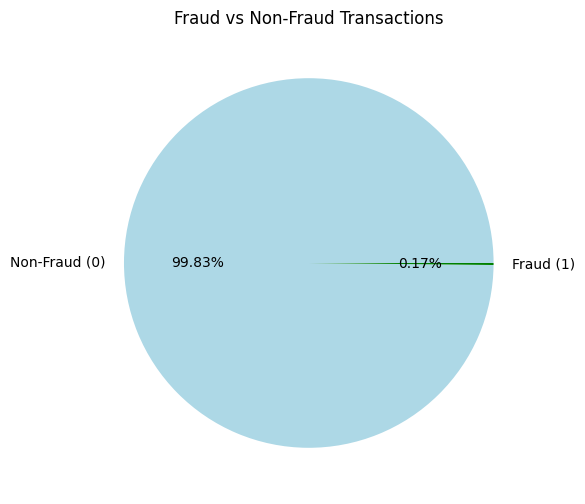

In [48]:
fraud_counts = df_credit_card['Class'].value_counts()

# Rename the index to more readable labels (optional)
fraud_counts.index = ['Non-Fraud (0)', 'Fraud (1)']

# Plot using pandas
fraud_counts.plot(kind='pie', autopct='%1.2f%%', figsize=(6, 6), title='Fraud vs Non-Fraud Transactions', ylabel='', colors=['lightblue', 'green'])

plt.show()

##### This visual shows the class imbalance of credit card fraud in the dataset
##### Before moving on, let us split our dataset into testing and training

In [49]:
# Create features
x = df_credit_card.drop(['Class'], axis=1)

y = df_credit_card['Class']


In [50]:
#now we split our data into a training and testing set
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.2 , random_state=42, stratify=y)

##### Before training our model, we apply random oversampling to upsample the minority class. This helps prevent the model from overfitting to the majority (non-fraudulent) class due to the severe class imbalance.

In [60]:
# Random Sampling
df_train = x_train.copy()
df_train['Class'] = y_train

df_majority = df_train[df_train['Class'] == 0] # seperate majority and minority
df_minority = df_train[df_train['Class'] == 1]

df_minority_upsampled = resample(df_minority, # upsample our minority
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)
# bring back together our rebalanced dataset
df_train_balanced = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1, random_state=42)

y_train_balanced = df_train_balanced['Class']
x_train_balanced = df_train_balanced.drop('Class', axis=1)

In [61]:
print(df_train_balanced.shape)
# here we see that our dataset has nearly doubled in rows indicating succsess with the upsampling

(454902, 31)


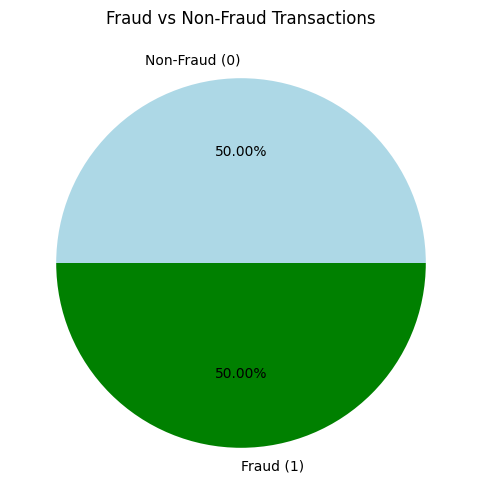

In [33]:
# lets replot our data to visualize the changes
fraud_counts = df_train_balanced['Class'].value_counts()

# Rename the index to more readable labels (optional)
fraud_counts.index = ['Non-Fraud (0)', 'Fraud (1)']

# Plot using pandas
fraud_counts.plot(kind='pie', autopct='%1.2f%%', figsize=(6, 6), title='Fraud vs Non-Fraud Transactions', ylabel='', colors=['lightblue', 'green'])

plt.show()

# This plot shows the distribution of our balanced datset indicating succsess with our random sampling
##### next we will scale our features to avoid certain features from dominating our model


In [34]:
scale = StandardScaler()

x_train_scaled = scale.fit_transform(x_train_balanced)
x_test_scaled = scale.transform(x_test)

In [35]:
#Create RandomForest Model
rf_model = RandomForestClassifier(
    n_estimators =100,
    max_depth=10,
    min_samples_split = 5,
    random_state=42
)

# We will also evaluate model performance on our training data using cross validation

In [36]:
# Perform Cross validation to check model performance
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='f1')
print('Cross validation f1 scores: ', cv_scores)
print('average f1 scores: ', np.mean(cv_scores))

Cross validation f1 scores:  [0.80882353 0.86486486 0.82993197 0.84285714 0.85106383]
average f1 scores:  0.8395082679420245


In [37]:
rf_model.fit(x_train_scaled, y_train_balanced)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

##### now let us test a prediction:

In [39]:
y_pred = rf_model.predict(x_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.86      0.74        98

    accuracy                           1.00     56962
   macro avg       0.82      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



### Looking at our classification report we can see ok performance

In [59]:
# Check how many rows of our testing set are fraudulent
fraud = y_test[y_test == 1]

print('In our testing set we have:', y_test.shape[0], 'rows of data,')
print('of those,', fraud.shape[0], 'are fraud cases.')

In our testing set we have: 56962 rows of data,
of those, 98 are fraud cases.


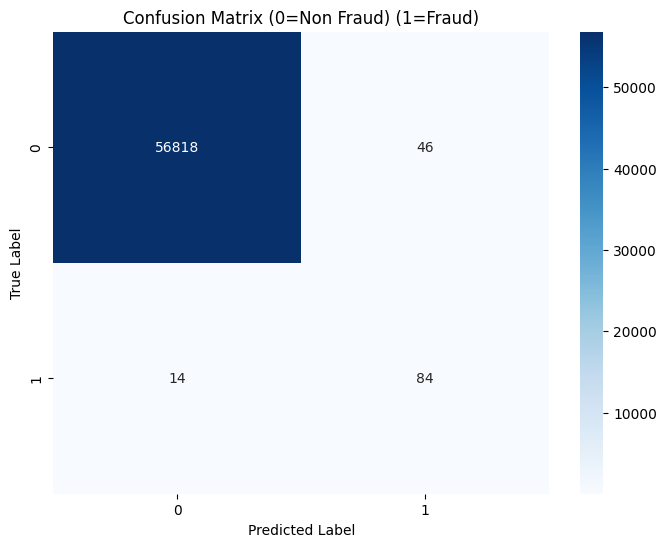

In [70]:
plt.figure(figsize=(8,6))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (0=Non Fraud) (1=Fraud)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Looking at our confusion matrix we can see that we correctly identify 84/98 of our fraudulet cases (86%) indicating good performance on our testing set

### let us now inspect the importance of our various features

In [41]:
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({'Feature':x.columns,
                            'Importance':importance}).sort_values('Importance', ascending=False)
feature_imp.head()

,Feature,Importance
14,V14,0.196055
10,V10,0.119030
4,V4,0.110259
12,V12,0.102510
17,V17,0.088086


### Plotting our feature importance we get:

<Figure size 800x600 with 0 Axes>

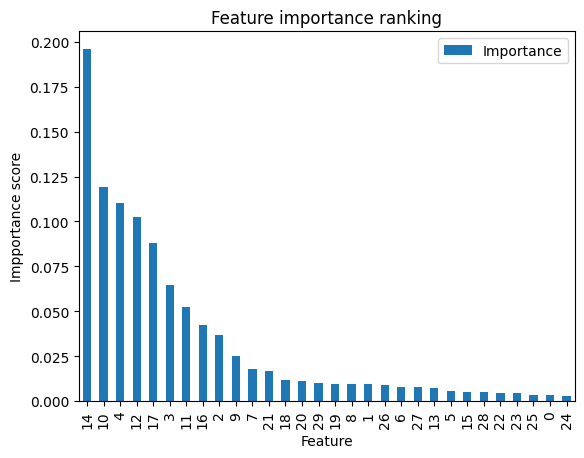

In [42]:
#lets visualize feature importance
plt.figure(figsize=(8,6))
feature_imp.plot(kind='bar')
plt.title('Feature importance ranking')
plt.xlabel('Feature')
plt.ylabel('Impportance score')
plt.show()

# Next let us plot the correlation between all of our variables

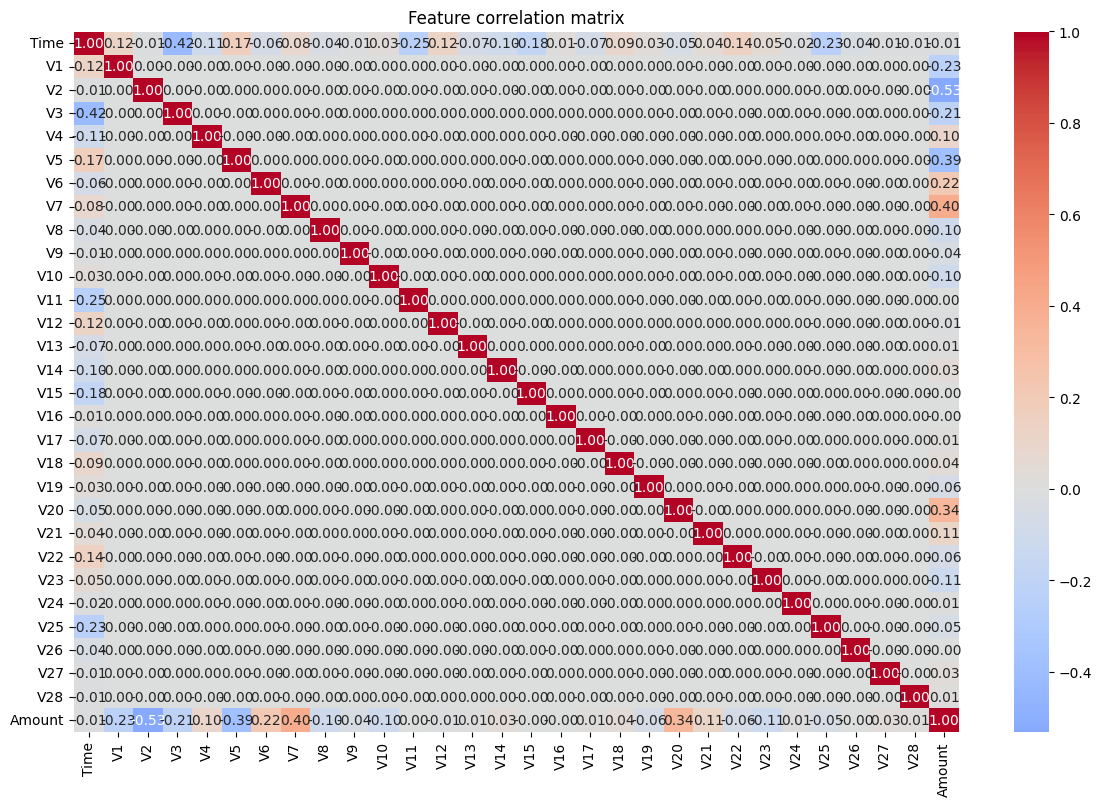

In [43]:
#now lets plot our correlations
plt.figure(figsize=(12,8))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm',center=0, annot=True, fmt='.2f')
plt.tight_layout()
plt.title('Feature correlation matrix')
plt.show()

# Next to validate the performance of our model let us use a precision recall curve

#### Precision-Recall was chosen over the ROC Curve due to the highly imbalanced nature of the dataset. In imbalanced settings, the large number of true negatives can make the ROC Curve overly optimistic. Precision-Recall is better suited here because it focuses on the performance with respect to the minority (positive) class, and is not influenced by the true negatives.

In [45]:
y_pred_proba = rf_model.predict_proba(x_test_scaled)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

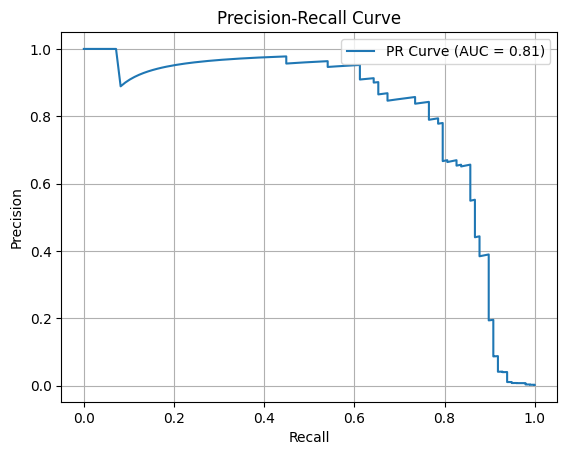

In [46]:
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

### looking at our precision recall curve we can see that our model is not perfect but does fairly well with medium high precision and medium high recall.

##### Since fraud is really bad we would like to prioritize a threshold that improves recall, this will allow us to flag more fraudulent cases as we would rather call somebody and check in than miss a fraudulent transaction

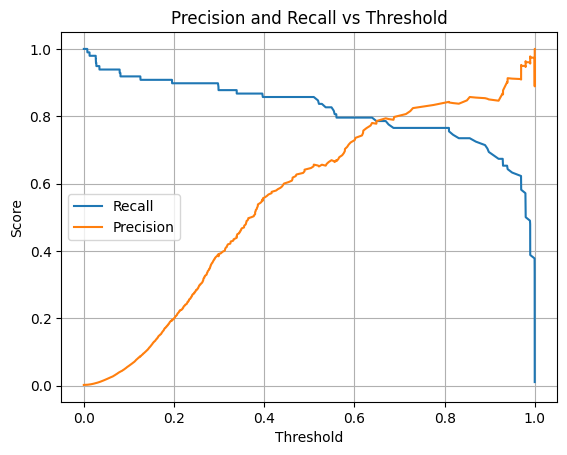

In [65]:
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, precision[:-1], label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
target_recall = 0.9
indices = np.where(recall >= target_recall)[0]
best_index = indices[np.argmax(precision[indices])]
best_threshold = thresholds[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

print(f"Optimal threshold for ≥90% recall: {best_threshold:.4f}")
print(f"Precision at this threshold: {best_precision:.4f}")
print(f"Recall at this threshold: {best_recall:.4f}")

Optimal threshold for ≥90% recall: 0.1955
Precision at this threshold: 0.1952
Recall at this threshold: 0.9082


#### Adjusting our threshold:

In [67]:
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9935    0.9967     56864
           1     0.1952    0.9082    0.3213        98

    accuracy                         0.9934     56962
   macro avg     0.5975    0.9509    0.6590     56962
weighted avg     0.9985    0.9934    0.9955     56962



# Now lets revisualize how our model performs with the adjusted threshold


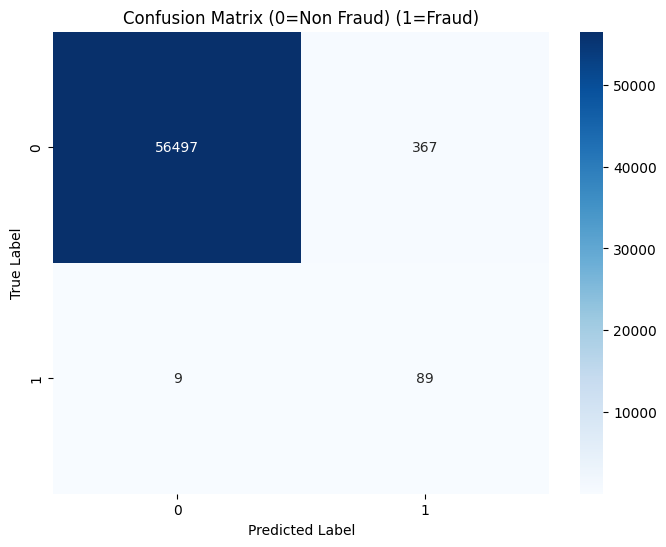

In [71]:
plt.figure(figsize=(8,6))

cm=confusion_matrix(y_test,y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (0=Non Fraud) (1=Fraud)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Now we can see that we correctly classify 91% of the fraudulent cases vs 86% as before, we can consider this an improvement since the recall is more important than the precision in real world fraud cases.

##### Conclusion: This notebook builds a credit card fraud dectection model on a highly imbalanced datasert using random sampling and RandomForest. The model is tuned via inspection of a precision curve and threshold values to optimize for catching fraud cases.

#Author:
##### Phillip Juricek